<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/04_polynomial_regression/2_polynomial_regression_theorie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

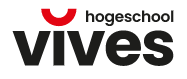<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# POLYNOMIALE REGRESSIE: THEORIE

In deze notebook komen volgende onderwerpen aan bod:

* Wat zijn polynomen of veeltermen?
* Wat is polynomiale regressie?
* Wat is underfitting en overfitting?
* Hoe stel je underfitting en overfitting vast bij regressie?
* Hoe kunnen we overfitting vermijden?
    * Techniek 1: model complexity graph
    * Techniek 2: regularisatie
* Waarom splitsen we onze dataset op?
    * Wat is de trainingset?
    * Wat is de validatieset?
    * Wat is de testset?

## Veeltermen

### Definitie

In de wiskunde is een **veelterm of polynoom** $p$ in één variabele of onbekende $x$ een uitdrukking van de vorm:

> $p(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + ... + a_n x^n$

In het Engels noemt men dit *polynomial*.

We kunnen ook gebruik maken van het sommatieteken:

> $p(x) = \sum_{k=0}^{n} a_k x^k$

waarbij $k$ een natuurlijk getal is, d.i. een integer groter dan of gelijk aan 0. De getallen $a_k$ zijn de **coëfficiënten**. De hoogste macht van de veelterm is de **graad** van de veelterm, in dit geval $n \neq 0$. In het Engels spreekt men van *degree*.

We merken dat we een constante krijgen wanneer $n=0$:

> $p(x) = a_0$

en de vergelijking van een rechte met intercept $a_0$ en rico $a_1$ wanneer $n = 1$:

> $p(x) = a_0 + a_1 x$

In het geval van een rechte hebben we een **lineaire vergelijking** omdat die geen machten van $x$ bevat.

Vanaf het moment dat de graad van de veelterm groter is dan 1, hebben we te maken met **niet-lineaire vergelijkingen**. Wanneer $n=2$ spreken we van een kwadratische veelterm, en wanneer $n=3$ van een kubische veelterm.

### Enkele voorbeelden

Laten we eens een paar veeltermen plotten om wat voeling te krijgen met die niet-lineaire vergelijkingen:

> $p(x) = 1$

> $p(x) = 2x$

> $p(x) = 4x^2 - 2$

> $p(x) = 8x^3 - 12x$

> $p(x) = 16x^4 - 48x^2 + 12$

> $p(x) = 32x^5 - 160x^3 + 120x$



Als we basic Python toepassen, dan kunnen we best eerst een functie definiëren die gebruik maakt van een list comprehension om $p(x)$ voor een gegeven $x$ te berekenen:

In [ ]:
def polynomial(a, x):
    # a is een list met de coëfficiënten a0, a1, a2, ...
    # x is de variabele
    return sum([a[k] * x**k for k in range(len(a))])

De laatste veelterm voor $x=2$ geeft dan:

In [ ]:
polynomial(a=[0, 120, 0, -160, 0, 32], x=2)  # coëfficiënten van kleinste naar grootste macht!

-16

Een beter alternatief is de `Numpy` functie `polyval`:

In [ ]:
import numpy as np

np.polyval(p=[32, 0, -160, 0, 120, 0], x=2)  # coëfficiënten van grootste naar kleinste macht!

-16

Let op! De coëfficiënten worden hier van grootste naar kleinste macht gesorteerd en toegekend aan argument `p`!

We gaan nu de 6 veeltermen plotten over het interval $[-2, 2]$:

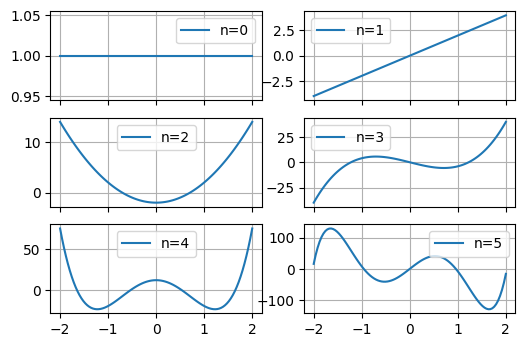

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100

p = [[1],
     [2, 0],
     [4, 0, -2],
     [8, 0, -12, 0],
     [16, 0, -48, 0, 12],
     [32, 0, -160, 0, 120, 0]]

x = np.linspace(-2, 2, 100)

fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True)
ax = [ax for row in ax for ax in row]
for i in range(len(p)):
    ax[i].plot(x, np.polyval(p[i], x));
    ax[i].grid();
    ax[i].legend([f'n={i}']);

Enkele observaties:
- $n=0$: we krijgen een horizontale rechte, want hier is de veelterm een constante waarde $a_0$.
- $n=1$: we krijgen een rechte, in dit voorbeeld een rechte door de oorsprong, omdat de intercept 0 is.
- $n \geq 2$: we krijgen krommen.  
- $n \geq 1$: het maximale aantal schommelingen of **oscillaties** is gelijk aan $n-1$!

### Meerdere variabelen

Er bestaan uiteraard ook **veeltermen in meer dan 1 variabele**. Stel dat je 2 variabelen $x_1$ en $x_2$ hebt, dan zou dit een veelterm in die 2 variabelen kunnen zijn:

> $p(x_1, x_2) = 5x_1^2x_2 - 10x_1^2 - 3x_2^2 + x_1x_2 - 7x_1 +3x_2 -20$

De graad van deze veelterm is 3 omdat we in dit geval de machten van de 2 variabelen moeten optellen. Hier hebben we een term die $x_1^2x_2$ bevat, en dus is de graad 2 + 1 = 3.

## Polynomiale regressie

### Uitleg

Heel vaak hebben we een **niet-lineair verband** tussen 2 variabelen, waardoor we geen enkelvoudige lineaire regressie kunnen toepassen, zoals in onderstaande figuur. In dit geval kunnen we proberen om onze data te fitten m.b.v. een polynoom:

> $y_i = a_0 + a_1 x_i + a_2 x_i^2 + ... + a_n x_i^n = \sum_{k=0}^{n} a_k x_i^k$

Hier is $x$ de **onafhankelijke variabele** en dus een **feature** in onze dataset, terwijl $y$ de **afhankelijke variabele** is, de feature die we voorspellen, ook wel **target** genoemd. Subscript $i$ verwijst naar het $i$-de datapunt of voorbeeld in de dataset.

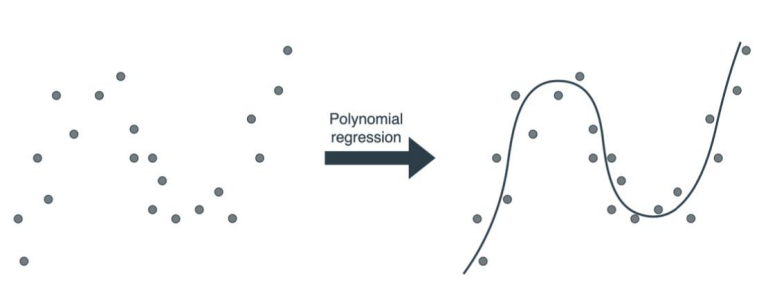

Om het nut van polynomiale regressie in machine learning te illustreren, geven we een fictief en een eenvoudig voorbeeldje uit de praktijk.

Stel dat we twee films hebben, "The Matrix" uit 1999, en Monty Python's "Life of Brian" uit 1979. Variable $x_1$ geeft aan hoelang een persoon naar "The Matrix" heeft gekeken, variabele $x_2$ hoelang diezelfde persoon naar "Life of Brian" heeft gekeken.

Neem nu een derde film, de nieuwste Spider-Man film uit 2021. Hoelang zal die persoon naar deze film kijken? Target $y$ is dus de te voorspellen tijd dat iemand naar deze nieuwe film kijkt.

Stel dat we lineaire regressie toepassen waarbij we het volgende model definiëren:

> $y = 0.5x_1 + 0.3x_2$

We zien dat hoe langer men naar film 1 heeft gekeken, hoe langer men ook naar de nieuwe film gaat kijken. Voor film 2 geldt net hetzelfde. Als we echter naar de data kijken, dan zien we dat hoe langer men naar film 1 en naar film 2 heeft gekeken, hoe minder lang men naar film 3 kijkt. Aangezien de tijd positief is, kunnen we dat probleem enkel oplossen door een niet-lineaire term aan onze vergelijking toe te voegen, bijv.

> $y = 0.5x_1 + 0.3x_2 - 0.1x_1x_2$

Door deze extra term krijgen we nu een veelterm in 2 variabelen van graad 2.

### Voorbeeld in NumPy

In `NumPy` is er de functie `polyfit` waarmee we een dataset met 2 variabelen kunnen fitten m.b.v. een veelterm van een opgegeven graad. Laten we opnieuw de laatste veelterm uit ons vorige hoofdstuk over veeltermen nemen:

> $p(x) = 32x^5 - 160x^3 + 120x$

We genereren enkele datapunten en voegen er een willekeurige meetfout aan toe die normaal verdeeld is mbv de `randn` functie uit NumPy module `random`:

In [ ]:
x = np.linspace(-2, 2, 20);
y = np.polyval([32, 0, -160, 0, 120, 0], x)

np.random.seed(0)  # random seed opgeven zodat we altijd hetzelfde resultaat krijgen
y += np.random.randn(len(y))  # fout met gemiddelde 0 en standaardafwijking 1

We passen de `polyfit` functie toe op de gegenereerde dataset. Deze functie leidt de optimale coëfficiënten af die een zo klein mogelijke gemiddelde afwijking geven tussen target en voorspellingen. M.a.w. `polyfit` geeft ons de best passende curve die beschreven wordt door een veeltermfunctie. De coëfficiënten van de veelterm zijn dus de **parameters** of gewichten van het regressiemodel die hier worden afgeleid m.b.v. de kleinste-kwadratenmethode (Engels: **Least Squares**).

Merk op dat we de graad van de veelterm moeten opgeven via argument `deg`. Omdat we die zelf moeten opgeven, is de graad van de veeltermfunctie dus een **hyperparameter**!

In [ ]:
a = np.polyfit(x, y, deg=5)
a

array([ 3.20330413e+01, -1.45879667e-01, -1.60346937e+02,  5.89657296e-01,
        1.20358901e+02,  2.68724529e-01])

Door de meetfout krijgen we niet exact dezelfde coëfficiënten, maar we krijgen dus wel de best mogelijke fit, want `polyfit` past de kleinste-kwadratenmethode toe die de som van de kwadraten van de afwijkingen tussen target en voorspellingen minimaliseert.

Laten we het resultaat eens plotten. Merk op dat we hier veel meer punten gaan gebruiken voor de voorspellingen omdat we een mooie vloeiende curve willen bekomen:

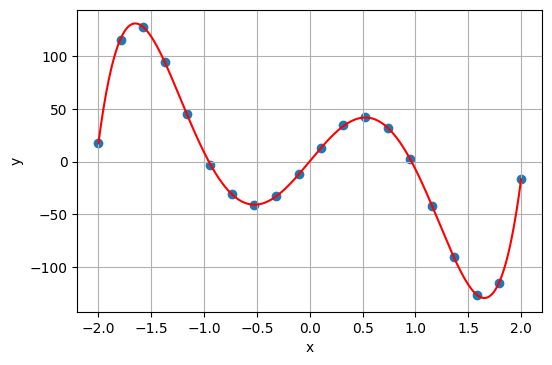

In [ ]:
xcurve = np.linspace(-2, 2, 500)  # genereert 500 punten in het interval [-2, 2]
ycurve = np.polyval(a, xcurve)
plt.scatter(x, y);
plt.plot(xcurve, ycurve, 'r-');
plt.grid()
plt.xlabel('x');
plt.ylabel('y');

Uiteraard kunnen we net als bij lineaire regressie de Mean Absolute Error (MAE) en de Mean Squared Error (MSE) berekenen:

In [ ]:
yp = np.polyval(a, x)  # voorspellingen van de datapunten

print("MAE:", np.round(np.mean(np.abs(y - yp)), 2))
print("MSE:", np.round(np.mean(np.square(y - yp)), 2))

MAE: 0.58
MSE: 0.49


Het berekenen van determinatiecoëfficiënt R² of correlatiecoëfficiënt R is hier ook mogelijk aangezien polynomiale regressie feitelijk een speciaal geval van lineaire regressie is, zoals we ook in de volgende sectie zullen zien. De wiskundige uitleg waarom dat zo is, ligt echter buiten het bestek van deze cursus.

### Zelfde voorbeeld in Scikit-Learn

Uiteraard kunnen we ook gebruik maken van Scikit-Learn. De werkwijze is iets ingewikkelder, maar het voordeel is wel dat we gebruik kunnen maken van de vele mogelijkheden van Scikit-Learn, zoals het berekenen van metrieken MAE en MSE.

Zoals hierboven reeds aangegeven is polynomiale regressie in feite een speciaal geval van lineaire regressie. Daarom dat we in Scikit-Learn ook gebruik maken van de `LinearRegression` klasse. Maar we moeten dan wel op voorhand de data bewerken aan de hand van de `PolynomialFeatures` klasse. M.b.v. functie `make_pipeline` maken we een "pipeline" aan om die twee stappen eenvoudig achter elkaar uitvoeren, terwijl we toch enkel de `fit` methode aanroepen.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

pr = make_pipeline(PolynomialFeatures(degree=5, include_bias=False),  # eerst de preprocessing (zonder bias!!)
                   LinearRegression())                                # dan de linear regression
pr.fit(X=x[:, np.newaxis], y=y)  # pas op! X moet 2D zijn!

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('linearregression', LinearRegression())])

Let op! De lineaire regressie houdt al rekening met de intercept, ook wel bias genoemd, dus we kunnen best `include_bias` op `False` zetten bij de `PolynomialFeatures`!

De coëfficiënten vinden we als volgt:

In [ ]:
a2 = pr.steps[1][1].coef_
a2 = np.insert(a2, 0, pr.steps[1][1].intercept_)  # machten van klein naar groot geordend: intercept vooraan toevoegen!
a2

array([ 2.68724529e-01,  1.20358901e+02,  5.89657296e-01, -1.60346937e+02,
       -1.45879667e-01,  3.20330413e+01])

Een beetje ingewikkelder, maar we vinden wel hetzelfde resultaat als met NumPy's `polyfit` functie. Let wel op dat de coëfficiënten hier van de kleinste macht naar de grootste macht zijn gesorteerd!

De metrieken MAE en MSE berekenen is nu wel eenvoudig:

In [ ]:
yp = pr.predict(x[:, np.newaxis])
print("MAE = {:.2f}".format(mean_absolute_error(y_pred=yp, y_true=y)))
print("MSE = {:.2f}".format(mean_squared_error(y_pred=yp, y_true=y)))

MAE = 0.58
MSE = 0.49


En ook hier krijgen we hetzelfde resultaat!

### Een voorbeeld met echte data

We lezen de file "belgium.gdp.json" in met het [Bruto Binnenlands Product](https://en.wikipedia.org/wiki/Gross_domestic_product) per inwoner in US Dollar van België voor de periode 1960 t.e.m. 2020:

In [ ]:
import pandas as pd
gdp = pd.read_json("belgium.gdp.json")
gdp.describe()

,jaar,bbp
count,61.000000,61.000000
mean,1990.000000,21160.826561
std,17.752934,16413.490246
min,1960.000000,1273.691659
25%,1975.000000,6701.377361
50%,1990.000000,20600.375279
75%,2005.000000,36795.976882
max,2020.000000,48106.892916


We maken een scatterplot:

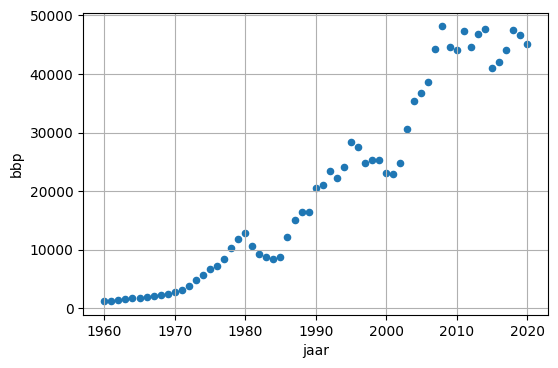

In [ ]:
gdp.plot.scatter(x="jaar", y="bbp")
plt.grid()

Enkelvoudige lineaire regressie zou het hier misschien niet zo heel slecht doen, maar laten we eens zien of we beter kunnen doen door polynomiale regressie toe te passen. We overlopen veeltermen met verschillende graden, en berekenen telkens de MAE als evaluatiemetriek om achteraf de verschillende modellen te kunnen vergelijken. Om alles efficiënt te laten verlopen, maken we uiteraard van een lus gebruik.

We gaan ook onze variabelen transformeren, omdat grote waarden de regressie bemoeilijken. Bij de x-waarden trekken we eenvoudigweg het minimum af, dat is dus 1960. De y-waarden transformeren we logaritmisch:

> $z = \log(y)$

met $z$ de logaritmisch getransformeerde targets.

In [ ]:
x = gdp.jaar.values.squeeze() - 1960  # 1960 aftrekken van x
z = np.log10(gdp.bbp.values.squeeze())  # logaritme nemen van y

degrees = range(1, 21)  # graden laten variëren van 1 tem 20

MAE = []
for deg in degrees:
    a = np.polyfit(x, z, deg)
    zp = np.polyval(a, x)
    MAE.append(np.mean(np.abs(z - zp)))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


We zien dat de `polyfit` functie bij de laatste 2 fits een warning weergeeft. Zonder in te gaan op de wiskundige details betekent die warning dat de fit niet zo betrouwbaar is.

Laten we nu eens het resultaat plotten:

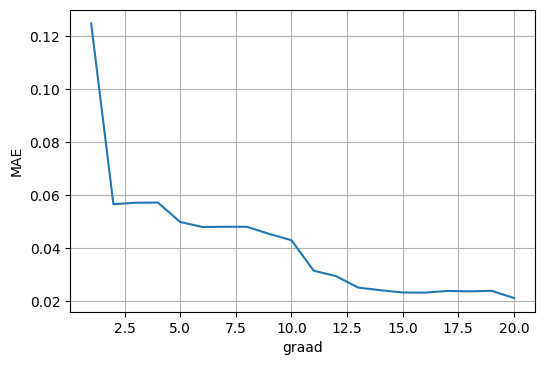

In [ ]:
plt.plot(degrees, MAE);
plt.xlabel("graad");
plt.ylabel("MAE");
plt.grid();

We zien dat de MAE steeds blijft dalen t.e.m. graad 15 (wanneer we rekening houden met de warnings bij de laatste 2 modellen en die niet meetellen). Dus kiezen we finaal voor de regressie met een veelterm van graad 15. Bij het berekenen van de voorspellingen, mogen we niet vergeten om die terug om te zetten:

> $z = \log(y) \iff y = 10^z$

In [ ]:
a = np.polyfit(x, z, deg=15)
zp = np.polyval(a, x)
yp = 10 ** zp  # niet vergeten de voorspellingen terug om te zetten!

Wanneer we de bekomen regressiecurve toevoegen aan de scatterplot met data, dan ziet dat er zeer goed uit!



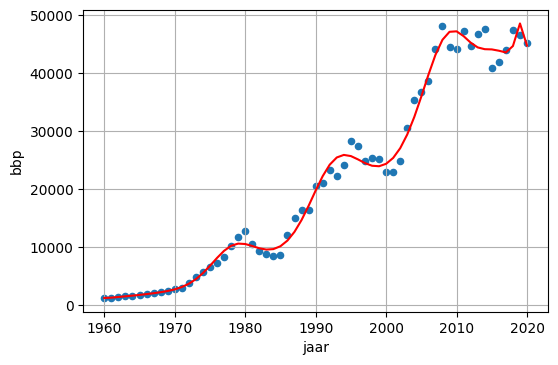

In [ ]:
gdp.plot.scatter(x="jaar", y="bbp");
plt.plot(x + 1960, yp, 'r-');  # niet vergeten om 1960 bij x op te tellen!
plt.grid();

Mooi! Nu kunnen we het BBP van België voorspellen voor de komende jaren, bijvoorbeeld t.e.m. 2050:



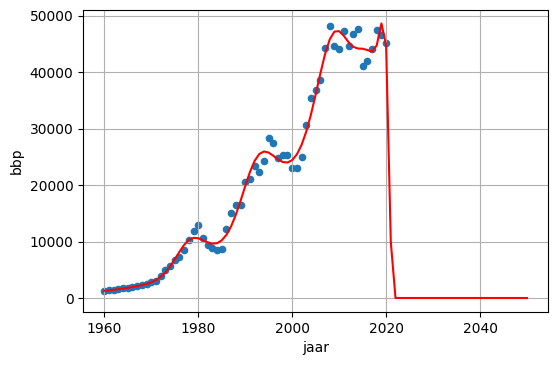

In [ ]:
jaren = np.arange(1960, 2051)
bbp = 10 ** np.polyval(a, jaren - 1960)  # niet vergeten om de jaren met 1960 te verminderen!

gdp.plot.scatter(x="jaar", y="bbp");
plt.plot(jaren, bbp, 'r-');
plt.grid();

Oeps! Dat ziet er niet realistisch uit! Wat is hier fout gelopen?!

Wel, we hebben ons model niet gebruikt om te interpoleren, maar om te **extrapoleren**, en zoals we zien houdt dat risico's in, zeker als we gebruik maken van veeltermen met een hoge graad!

Bovendien gaat het hier om een **tijdreeks** (Engels: timeseries), een reeks van data met de tijd als index. Het bestuderen en toepassen van (betere) methodes om voorspellingen te maken a.d.h.v. tijdreeksen, is een deelgebied van de wiskunde dat we *tijdreeksanalyse* noemen, en dit valt buiten de scope van dit topic. Maar we kunnen wel intuïtief aanvoelen dat we bij het voorspellen van het BBP in 2025 meer rekening gaan moeten houden met het BBP van recente jaren dan met dat van vroegere jaren. M.a.w. bij tijdreeksen is de *volgorde* van de datapunten belangrijk, terwijl dat bij andere datasets vaak niet het geval is. Bij lineaire en polynomiale regressie geven we elk datapunt evenveel gewicht bij het voorspellen, wat vaak tot slechte resultaten leidt bij tijdreeksen doordat ze geordend zijn.

Maar zelfs als we polynomiale regressie toepassen om data te interpoleren, dan nog is de werkwijze die we hier hebben toegepast geen goed idee. Dat heeft te maken met het fenomeen van **overfitting**.

## Underfitting en overfitting

Aangezien underfitting en overfitting twee fundamentele begrippen in machine learning en deep learning zijn, is dit een **zeer belangrijk hoofdstuk** in de cursus! We leggen eerst de begrippen grondig uit en geven dan enkele technieken die je kan toepassen om ze op te sporen en te voorkomen. Want één ding is zeker: je wil liefst geen modellen deployen die aan underfitting of overfitting lijden!

### Uitleg

*Een veel voorkomend scenario...*

Je ontwikkelt een machine learning oplossing, je **traint een model** en je gebruikt het in je software. Tijdens het ontwikkelen zag alles er goed uit, het model deed wat het moest doen **op de data die je voorhanden had**, maar toch gaat het mis: voor **nieuwe data zijn de voorspellingen echt slecht**. Wat is er mis gegaan?! Waarschijnlijk lijdt jouw model aan underfitting of overfitting!

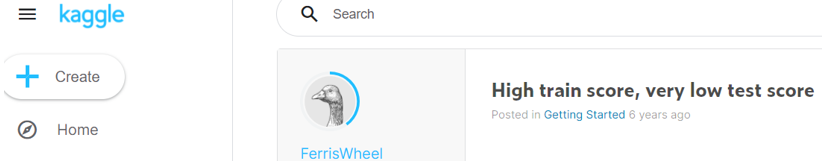

*Maar wat zijn underfitting en overfitting?*

Vergelijk het met het studeren voor een examen: je kan ofwel te weinig ofwel te veel gestudeerd hebben:
* Als je te weinig gestudeerd hebt, dan is je kennis van de leerstof te oppervlakkig. Als je nieuwe oefeningen of vragen krijgt, dan zal je daar niet goed kunnen op antwoorden, want je hebt te weinig kennis.
* Als je te veel gestudeerd hebt, dan ken je quasi alle oefeningen en vragen die in de cursus staan uit het hoofd. Als je dan zo'n vraag of oefening krijgt op het examen, dan kan je, zonder dat je zelfs de leerstof echt begrijpt, een goed antwoord geven en veel punten scoren! Maar... op nieuwe vragen doe je het niet goed, want je begrijpt de essentie van de cursus niet, en je hebt teveel tijd besteed aan details.

Bij Machine Learning heb je hetzelfde probleem:
* **Underfitting** is zoals te weinig studeren voor een examen.
* **Overfitting** is zoals te veel tijd spenderen aan details en van buiten blokken, en zo de essentie van de leerstof missen.

Bij machine learning is het cruciaal dat je het juiste type model kiest, het model dat bij je data past, en er de nodige informatie kan uithalen. Je kan het vergelijken met het volgende (absurde) voorbeeld:

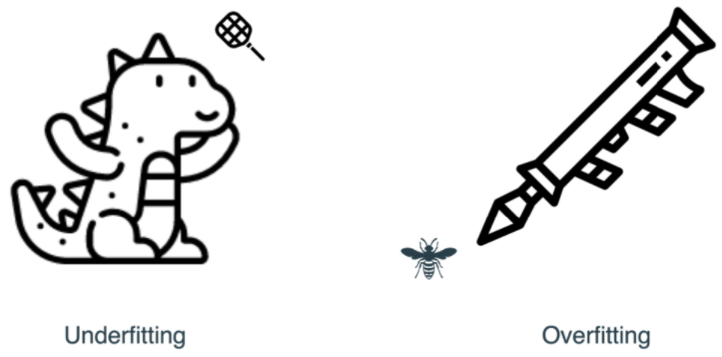

Als je Godzilla probeert te doden met een vliegenmepper, dan kom je er niet. Als je een mug probeert te doden met een bazooka, dan lukt dat wel, maar voor de nabije omgeving van de mug is dat nefast.
Bij machine mearning is dat precies hetzelfde:

* is je **model te eenvoudig**, dan zal het cruciale informatie in de data niet kunnen capteren en krijg je **underfitting**;
* is je **model te complex** voor de taak, dan zal je nutteloze details leren, en krijg je **overfitting**.


*Niet vergeten!!!*
> Voor elke taak in machine learning, maar ook in computerwetenschappen in het algemeen: gebruik steeds het juiste gereedschap voor de taak! D.w.z. het juiste model in machine learning, de juiste programeertaal en het juiste framework in software development, enzovoort!

Want je klopt toch ook geen nagels in een houten plank met een zaag?

### Regressie

Wat zou het beste model zijn voor de volgende data?

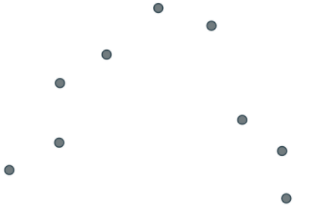

Net als hierboven kunnen we ook deze dataset fitten met veeltermen van verschillende graad:

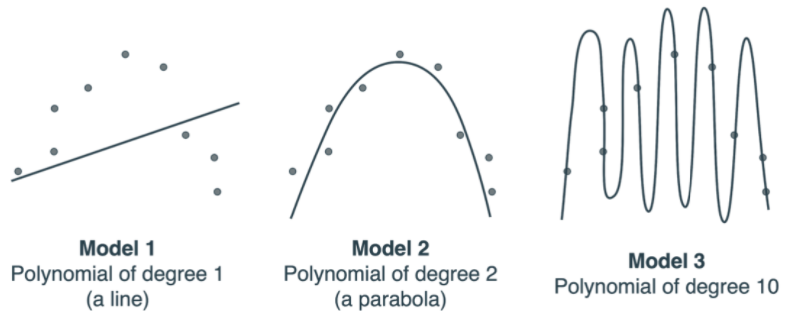

Op de bovenstaande figuur testen we dus drie modellen uit: een lineair model en een polynomiaal model van graad 2 en graad 10.

Wij als mens kunnen makkelijk de data en het model visualiseren en zien welk model aan underfitting doet (model 1), welk model aan overfitting (model 3), en welk model een goeie fit geeft (model 2).

Voor een computer is het echter moeilijk om deze visuele analyse te maken. We moeten dus op zoek gaan naar een andere (numerieke) manier om de analyse te maken. M.a.w. we moeten een antwoord vinden op de vraag hoe we een algoritme het juiste model kunnen laten kiezen.

Het korte antwoord op deze vraag is: **VALIDEREN**!

Om een model te valideren heb je data nodig, maar die data mag je NIET gebruiken om het model te trainen. We moeten daarom onze dataset opsplitsen in twee subsets:
* een **trainingset** met data die je gebruikt om het model te trainen, bijvoorbeeld 80% van de beschikbare data;
* een **validatieset** met data die je gebruikt om te valideren, d.i. om het model te controleren op underfitting en overfitting, bijvoorbeeld de overige 20% van de beschikbare data.

Laten we dit even toepassen op de data van de vorige twee figuren. Op de figuur hieronder zijn de stippen de datapunten uit de trainingset, terwijl de driehoekjes de datapunten uit de validatieset zijn. Voor elk model berekenen we de gemiddelde fout (bv. de MAE of MSE) voor de twee datasets:
* De bovenste rij toont de fout van de drie verschillende modellen op de trainingset.
* De onderste rij toont de fout van de drie verschillende modellen op de validatieset.

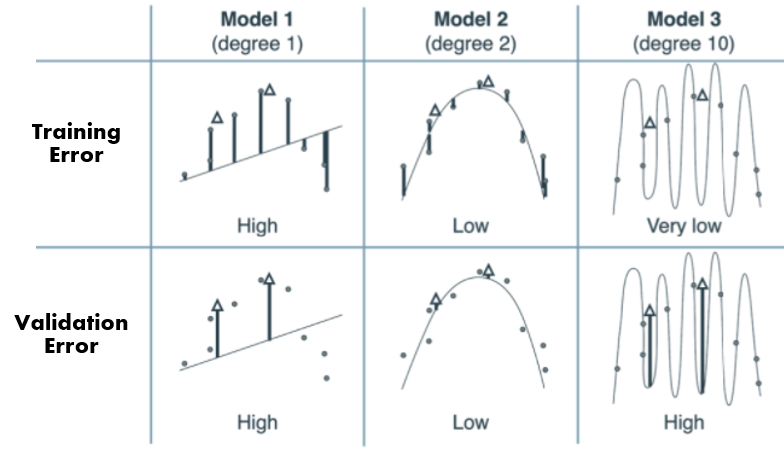

We stellen het volgende vast op de figuur:

* Model 1 is het eenvoudigste model, en dus kunnen we hier underfitting verwachten. Als we naar de fout kijken, dan zien we dat:
    * de fout op de trainingset groot is;
    * de fout op de validatieset ook groot is.
    
* Model 3 is het meest complexe model, en dus kunnen we hier overfitting verwachten. Als we naar de fout kijken dan zien we dat:
    * de fout op de trainingset zeer laag is;
    * de fout op de validatieset *hoog* is!
    
* Model 2 daarentegen is niet te eenvoudig, maar ook niet te complex. Als we naar de fout kijken, dan zien we dat:
    * de fout op de trainingset laag is;
    * de fout op de validatieset ook laag is!


**We kunnen het volgende besluiten:**

* Bij **underfitting**:
    * Het model is te eenvoudig voor de dataset, te generiek, het gaat met andere woorden overgeneraliseren
    * Het model zal daardoor niet goed presteren op data uit de validatieset...
    
* Bij **overfitting**:
    * Het model is te compex voor de dataset, te specifiek, het gaat met andere woorden te weinig generaliseren
    * Het model zal daardoor niet goed presteren op data uit de validatieset...

* We zoeken dus een model dat niet aan underfitting en niet aan overfitting lijdt:
    * Het model is niet té generiek en niet té specifiek.
    * Het model zal daardoor ook goed presteren op data uit de validatieset!
    

We moeten dus een balans vinden tussen **optimalisatie**, d.i. het model de data zo goed mogelijk laten fitten tijdens de trainingsfase, en **generalisatie**, d.i. het model ook betrouwbare voorspellingen laten maken op nieuwe data tijdens de inferentiefase (zie verder).

In een meer statistische bewoording heeft men het over de **bias-variance tradeoff**. Een te eenvoudig model heeft een hoge *bias* error. Er werden m.a.w. verkeerde veronderstellingen gemaakt over het model. Denk aan het toepassen van lineaire regressie om een niet-lineair verband tussen variabelen te modelleren. Een te complex model zal dan weer een kleine bias error hebben.

De *variantie* geeft weer hoe gevoelig een model is voor kleine fluctuaties in de data, wat we ruis noemen, of *noise* in het Engels. Een eenvoudig model heeft een kleine variantie, een complex model een grote variantie. Onderstaande figuur verduidelijkt de begrippen aan de hand van een analogie met vogelpikken.

De *tradeoff* verwijst tenslotte naar het compromis dat we moeten vinden tussen bias en variantie, want bij underfitting heeft het model een hoge bias en kleine variantie, en bij overfitting een lage bias en grote variantie.

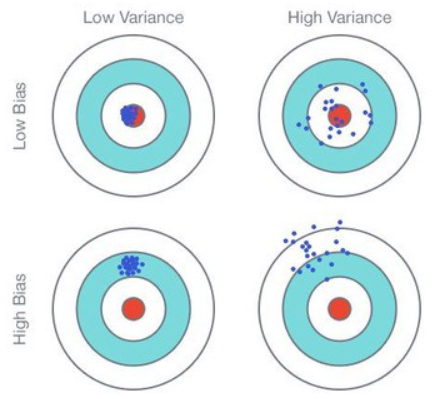

In machine learning zijn er gelukkig **verschillende technieken** beschikbaar **om overfitting tegen te gaan**. In dit topic bespreken we er twee voor regressie: de *model complexity graph* en *regularisatie*.

### Techniek 1: model complexity graph

De eerste en eenvoudigste techniek is eigenlijk een kleine uitbreiding op wat we hierboven hebben gedaan. We gaan verschillende polynomiale modellen trainen, maar deze keer berekenen we de fout voor de trainingset én voor de validatieset. Deze fouten zetten opnieuw uit in een grafiek: de model complexity graph. Zo krijgen we twee curves: één voor de trainingset en één voor de validatieset. Het beste model is dan het model dat voor beide sets de kleinste fout geeft.

Als we moeten beslissen welke graad we willen gebruiken in een model, dan moeten we verschillende mogelijkheden proberen. Om te beslissen welk model het best is, kijken we naar de training error (error op de trainingset) en de validation error (error op de validatieset). We willen geen overfitting, dus zoals we in de vorige sectie hebben aangegeven, streven we naar een kleine training error én een kleine validation error. Van zodra de validation error niet meer daalt terwijl de training error verder blijft dalen, hebben we te maken met overfitting. We zien dit mooi afgebeeld in de onderstaande figuur:

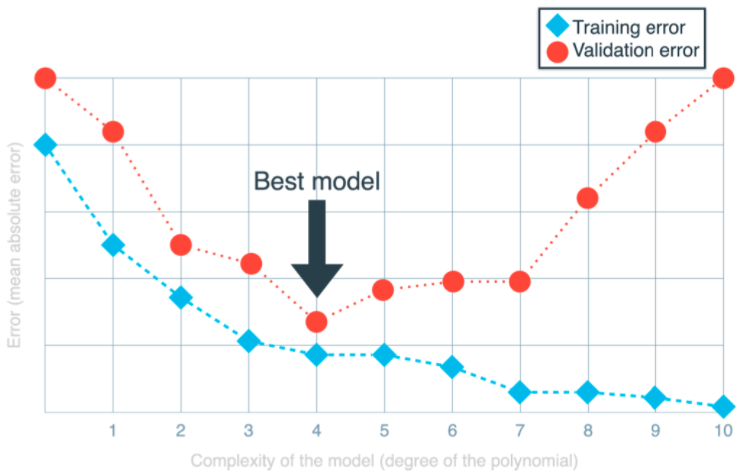

Bovenstaande figuur is een voorbeeld van een **model complexity graph**. Op de X-as laten we de graad van het regressiemodel toenemen, op de Y-as staat de waarde van de errorfunctie, bijvoorbeeld de MAE of MSE. De graad van het regressiemodel is inderdaad een maat voor de complexiteit van het model, want hoe hoger die graad, hoe meer parameters - in dit geval coëfficiënten - het model bevat.

Tot graad 4 dalen zowel de training error als de validation error. Vanaf graad 4 zien we duidelijk dat de validation error weer toeneemt terwijl de training error blijft dalen. Het model met graad 4 zal dus het beste model zijn. Elke model complexity graph zal ongeveer deze vorm aannemen en kan daardoor gebruikt worden om te beslissen welk model we best kiezen.

*Voorbeeldje*

Laten we dat eens illustreren met de veelterm die we hierboven reeds hebben gefit:

> $p(x) = 32x^5 - 160x^3 + 120x$

We genereren 100 datapunten en voegen opnieuw een willekeurige meetfout toe die normaal verdeeld is, maar deze keer maken we de fout wel groter door een standaardafwijking van 10 te nemen ipv 1:

In [ ]:
x = np.linspace(-2, 2, 100);
y = np.polyval([32, 0, -160, 0, 120, 0], x)

np.random.seed(0)  # random seed opgeven zodat we altijd hetzelfde resultaat krijgen
y += np.random.randn(len(y)) * 10  # fout met gemiddelde 0 en standaardafwijking 10

Deze keer splitsen we de dataset op in een training- en validatieset. Dat opsplitsen moeten we natuurlijk willekeurig doen. We doen dit door de indices te shuffelen en daarna de ene helft van de indices te gebruiken voor de validatieset en de andere helft voor de trainingset:  

In [ ]:
idx = np.arange(len(x))  # de indices van de datapunten
np.random.shuffle(idx)  # indices shuffelen
n = len(idx) // 2  # de dataset in twee gelijke stukken verdelen - pas op! integer division gebruiken!
ival = idx[:n]  # de indices van de datapunten in de validatieset
itrain = idx[n:]  # de indices van de datapunten in de trainingset

Laten we de opgesplitste dataset eerst eens plotten ter controle:

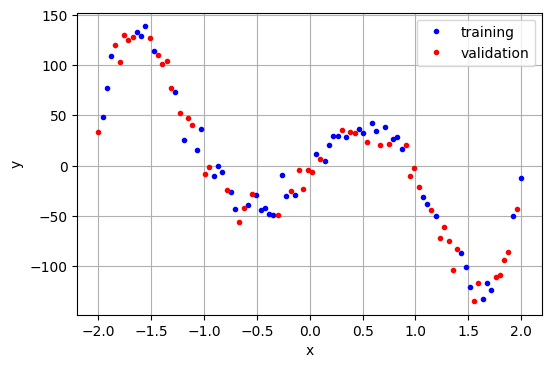

In [ ]:
plt.plot(x[itrain], y[itrain], 'b.', x[ival], y[ival], 'r.');
plt.xlabel('x');
plt.ylabel('y');
plt.grid();
plt.legend(['training', 'validation']);

De datapunten zijn mooi verdeeld over training- en validatieset. Laten we nu verschillende polynomiale modellen trainen waarbij de graad varieert van 1 t.e.m. 20, zoals we hierboven ook al deden. Maar deze keer leiden we de coëfficiënten enkel af o.b.v. de trainingset! Daarna berekenen we de voorspellingen voor alle datapunten. Tenslotte berekenen we de MAE afzonderlijk voor training- en validatieset:

In [ ]:
degrees = range(1, 21)  # de graad van de veeltermen

MAE_train = []  # list initialiseren voor MAE van de training data
MAE_val = []  # list initialiseren voor MAE van de validatie data

for n in degrees:
    a = np.polyfit(x[itrain], y[itrain], deg=n)  # enkel de trainingset fitten!
    yp = np.polyval(a, x)  # voorspellingen van alle datapunten
    MAE_train.append(np.mean(np.abs(yp[itrain] - y[itrain])))  # MAE van de training data
    MAE_val.append(np.mean(np.abs(yp[ival] - y[ival])))  # MAE van de validatie data

Nu rest ons enkel nog de model complexity graph te plotten:

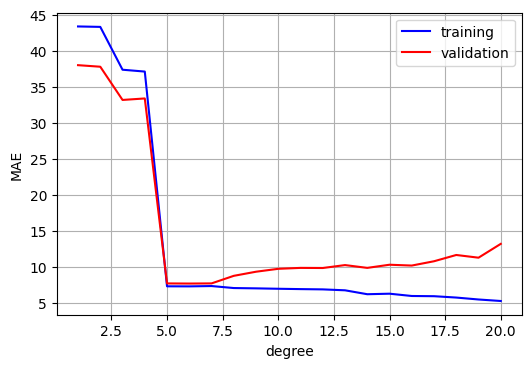

In [ ]:
plt.plot(degrees, MAE_train, 'b-', degrees, MAE_val, 'r-')
plt.xlabel('degree');
plt.ylabel('MAE');
plt.grid();
plt.legend(['training', 'validation']);

De vorm wijkt wat af van de typische grafiek die we in de figuur hierboven hebben besproken, maar we zien wel duidelijk dat de MAE van de trainingset blijft dalen, terwijl die van de validatieset vanaf graad 7 weer begint stijgen. We zien ook een plateau van graad 5 t.e.m. 7, en daarom nemen we als finale model een veelterm van graad 5, omdat dit minder parameters bevat. We voeren de regressie opnieuw uit, deze keer op de volledige dataset:

In [ ]:
a = np.polyfit(x, y, deg=5)
a

array([ 3.12013880e+01,  1.00197087e-01, -1.56282920e+02,  2.88714278e+00,
        1.15854095e+02, -3.66288352e+00])

Door de grote fout wijken de coëfficiënten wat af van de "echte" coëfficiënten, maar de MAE ligt zoals te verwachten binnen de standaardafwijking van de meetfout:

In [ ]:
yp = np.polyval(a, x)
MAE = np.mean(np.abs(y - yp))
MAE

7.303895740027681

En als we de regressiecurve plotten, dan zien we een zeer goede fit:

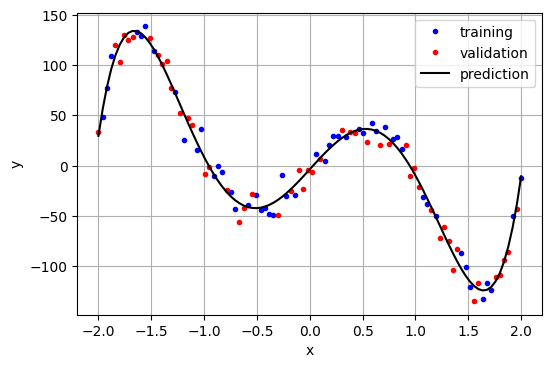

In [ ]:
xcurve = np.linspace(-2, 2, 100)
ycurve = np.polyval(a, xcurve)
plt.plot(x[itrain], y[itrain], 'b.', x[ival], y[ival], 'r.', xcurve, ycurve, 'k-');
plt.xlabel('x');
plt.ylabel('y');
plt.grid();
plt.legend(['training', 'validation', 'prediction']);

*Overfitting detecteren bij andere machine learning modellen*

Tijdens het trainen van **neurale netwerken** zullen we een gelijkaardige techniek toepassen, maar in dit geval zullen we de fout van de training- en validatieset bekijken in functie van het aantal epochs. Vanaf een bepaald aantal epochs zal ook overfitting optreden, en dan moeten we uiteraard het trainen stoppen, zoals op de figuur hieronder wordt weergegeven. We zien dat de grafiek die de loss of error uitzet in functie van het aantal iteraties of epochs, inderdaad dezelfde vorm heeft als de model complexity graph:

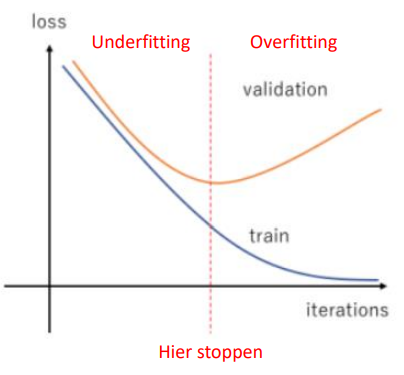

Bij **decision trees** kunnen we ook zo'n curve opstellen. Wanneer een decision tree voor classificatie wordt gebruikt, dan kunnen we bijv. de nauwkeurigheid van de voorspellingen uitzetten t.o.v. de grootte van de beslissingsboom. Hoe groter de nauwkeurigheid, hoe kleiner de fout, en hoe groter de beslissingsboom, hoe complexer het model. Overfitting treedt dus op wanneer de nauwkeurigheid op de validatieset niet meer stijgt terwijl de nauwkeurigheid op de trainingset wel blijft stijgen. De figuur hieronder toont hoe we door de beslissingsboom te "snoeien" (Engels: pruning) het effect van overfitting kunnen tegengaan:

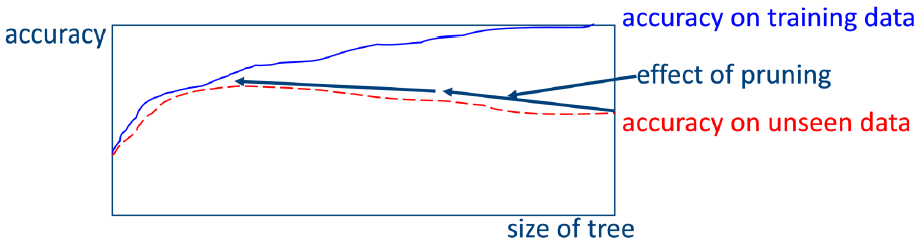

Het probleem bij het opstellen van een model complexity graph, is dat we altijd moeten trainen voorbij het punt dat er overfitting optreedt. De volgende techniek probeert overfitting tegen te gaan tijdens het trainen van slechts één model.

### Techniek 2: regularisatie

Het trainen van meerdere modellen en het "beste" eruit kiezen (dit is het model met de "beste" predicties zonder underfitting of overfitting - zie meer daarover in een volgend topic) kan veel nutteloze rekenkracht vergen. In dat opzicht zou het beter zijn als we maar één model moeten trainen. Daarvoor moeten we er tijdens het trainen voor zorgen dat een model dat mogelijks te complex is, toch niet zal lijden aan overfitting.

Hier komt **regularisatie** in beeld: we proberen tijdens het trainen ervoor te zorgen dat én de performantie op de data goed is én het model *eenvoudig* blijft.

We herinneren ons uit het topic over lineaire regressie dat we bij Gradient Descent de **errorfunctie** minimaliseren. Een functie die we met een optimizer zoals Gradient Descent minimaliseren, noemen we algemeen een *doelfunctie* of *kostfunctie*. In het Engels spreekt men van objective of cost function.

De errorfunctie kijkt echter alleen maar naar de performantie van het model. Het is een maat voor hoe goed het voorspellingen maakt. We willen echter ook de complexiteit van het model in rekening brengen. We hebben dus nog een functie nodig die meet hoe ingewikkeld ons model is: de **complexiteitsfunctie**. En die functie moet ook geminimaliseerd worden zodat het model zo eenvoudig mogelijk blijft.

Daarom gaan we niet alleen de errorfunctie minimaliseren, maar een combinatie van error- en complexiteitsfunctie. Zo komen we tot een nieuwe doel- of kostfunctie die moet geminimaliseerd worden:

> `new_cost_function = performance_cost_function + complexity_cost_function`

De vraag is nu: hoe meten we de complexiteit van een model, of hoe ziet de complexiteitsfunctie eruit?

*De analogie van de dakwerker*

Om die vraag te beantwoorden bekijken we overfitting eerst eens op een andere manier a.d.h.v. een analogie. Stel dat je je dak moet herstellen omdat er een lek is. Je hebt drie mogelijkheden:
* oplappen met ducttape;
* nieuwe dakpannen leggen;
* waterdicht maken met titanium.

Voor een mens is het duidelijk wat underfitting en wat overfitting is! Maar hoe kunnen we dit a.d.h.v. een getal uitdrukken? M.a.w. hoe kan een computer het onderscheid maken?

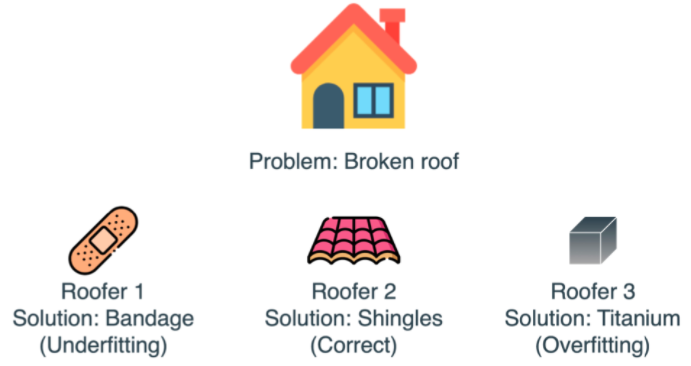

We moeten proberen zowel de performantie als de complexiteit van de oplossing uit te drukken met numerieke waarden. Voor de performantie of effectiviteit van de gekozen oplossing kunnen we meten hoeveel water er nog lekt na het toepassen van de oplossing:
* oplossing 1: 1000 ml water
* oplossing 2: 1 ml water
* oplossing 3: 0 ml water

De complexiteit of ingewikkeldheid kan gemeten worden door te kijken naar de kostprijs van de gekozen oplossing:
* oplossing 1: € 1
* oplossing 2: € 100
* oplossing 3: € 100.000

Welke oplossing is nu de meest geschikte om het lekkende dak te herstellen? Duidelijk oplossing 2, want als we performantie en complexiteit optellen, dan bekomen we:
* oplossing 1: 1001
* oplossing 2: 101
* oplossing 3: 100.000

*Een machine learning voorbeeld*

Laten we nu eens kijken naar een vereenvoudigd machine learning probleem. We hernemen het voorbeeld van het aanbevelen van een film op basis van eerdere films die bekeken werden. We gaan ervan uit dat er 10 films $M_1$, $M_2$, ..., $M_{10}$ in ons systeem zitten. We willen nu voorspellingen doen voor film $M_{11}$. We gebruiken hiervoor een lineair regressie model:

> $y = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + w_6x_6 + w_7x_7 + w_8x_8 + w_9x_9 + w_{10}x_{10}$

met:

* $y$ de voorspelde tijd die de gebruiker aan film 11 spendeert;
* $x_i$ de tijd die de gebruiker aan film $i$ gespendeerd heeft;
* $w_i$ het gewicht in het model dat hoort bij feature $x_i$;
* $w_0$ de bias of intercept.

Stel dat we twee modellen hebben waarmee we de voorspelling kunnen berekenen:

- Model 1:

> $y = 4 + 2x_3 + 1.4x_7 - 0.5x_9$

- Model 2:

> $y = 8 + 22x_1 - 103x_2 - 14x_3 + 109x_4 - 93x_5 + 203x_6 + 87x_7 - 55x_8 + 378x_9 - 25x_{10}$

Wat is nu het meest complexe model?

Dat is overduidelijk Model 2, want:

* We zien grote gewichten. Zo is het bijvoorbeeld heel onwaarschijnlijk dat de tijd die een gebruiker spendeert aan de nieuwe film afhangt van -103 keer de tijd gespendeerd aan $M_2$.
* We zien dat het tweede model heel veel parameters gebruikt, want geen enkel gewicht $w_i$ is nul.

Nochtans geeft Model 1 ons ook heel wat informatie:
* Als een gebruiker veel tijd spendeert aan $M_3$ en $M_7$, dan zal de gebruiker $M_{11}$ waarschijnlijk zeer interessant vinden.
* Als een gebruiker veel tijd spendeert aan $M_9$, dan zal de interesse voor $M_{11}$ waarschijnlijk gering zijn.

Als het aankomt op eenvoud, dan prefereren we dus model 1. Maar Model 2 zal waarschijnlijk wel een kleinere fout hebben op de trainingset en dus gaat model 2 gekozen worden als we enkel kijken naar de performantie. We moeten er dus op de één of andere manier voor zorgen dat de complexiteit van Model 2 mee in rekening wordt gebracht tijdens het minimaliseren van de errorfunctie.

*Complexiteit van een model: $L_1$-en $L_2$-norm*

Het vorige voorbeeld geeft een goede hint waarop de complexiteitsfunctie gebaseerd kan worden. Een complex model bevat immers veel coëfficiënten (of gewichten) en die zijn behoorlijk groot!

Twee functies of formules zijn mogelijk:
* **de $L_1$-norm**: de som van de absolute waarden van de gewichten;
* **de $L_2$-norm**: de som van de kwadraten van de gewichten.

We berekenen voor Model 1 en Model 2 uit het vorige voorbeeld de normen als volgt:

- Model 1
  * $L_1$-norm: $|2| + |1.4| + |-0.5| = 3.9$
  * $L_2$-norm: $(2)^2 + (1.4)^2 + (-0.5)^2 = 6.21$

- Model 2

  * $L_1$-norm: $|22| + |-103| + |-14| + |109| + |-93| + |203| + |87| + |-55| + |378| + |-25| = 1089$
  * $L_2$-norm: $(22)^2 + (-103)^2 + (-14)^2 + (109)^2 + (-93)^2 + (203)^2 + (87)^2 + (-55)^2 + (378)^2 + (-25)^2 = 227131$

Merk op dat de bias $w_0$ *niet* wordt meegerekend! We zien dat zowel de $L_1$-norm als de $L_2$-norm van Model 2 hoger is dan die van Model 1, waaruit we inderdaad kunnen besluiten dat Model 2 complexer is dan Model 1.

*Lasso- en Ridge-regressie*

We kunnen nu de $L_1$-en $L_2$-norm toevoegen aan de kostenfunctie bij lineaire en polynomiale regressie:
* Gebruiken we de $L_1$-norm, dan spreken we van **Lasso-regressie**:
> ```lasso_regressie_cost = regressie_cost + L1_norm```
* Gebruiken we de $L_2$-norm, dan spreken we van **Ridge-regressie**:
> ```ridge_regressie_cost = regressie_cost + L2_norm```

Het toepassen van de $L_1$-norm en/of de $L_2$-norm voor het beheersen van de complexiteit van het model, noemt men **regularisatie**. De $L_1$- en $L_2$-norm is de complexiteitskost of de **regularisatiekost**.

We moeten echter opletten dat we niet te veel gaan regulariseren. Om dat te kunnen regelen gaan we een nieuwe hyperparameter $\lambda$ invoeren, **de regularisatieparameter**, waarmee we kunnen bepalen hoeveel van de complexiteitskost of regularisatiekost we meerekenen in de totale regressiekost.

Enkele voorbeelden:
* $\lambda = 0$: de regularisatiekost wordt niet meegeteld;
* $\lambda = 0.01$ of $\lambda = 0.1$: een deel van de regularisatiekost wordt meegeteld;
* $\lambda = 10$ of $\lambda = 100$: een veelvoud van de regularisatiekost wordt meegeteld.

Regularisatieparameter $\lambda$ beïnvloedt net zoals de learning rate de werking, de performantie en de kwaliteit van een model. Het is ook een *hyperparameter*, omdat die door de gebruiker wordt opgegeven. Voor elke combinatie van een model en een dataset moet een optimale waarde gezocht worden. Dit gebeurt meestal via experimenten: men probeert meerdere waarden uit en kijkt welke waarde best werkt.


Lasso- en Ridge-regularisatie hebben een verschillend effect op de coëfficiënten. In praktijk zien we vaak het volgende effect:

* Lasso-regressie zorgt ervoor dat coëfficiënten klein worden en sommige zelfs nul, waardoor het model minder coëfficiënten zal overhouden.

* Ridge-regressie zorgt ervoor dat coëfficiënten klein worden, maar ze worden zelden nul.

Afhankelijk van welk effect we willen bekomen, kunnen we dus voor Lasso-regressie of Ridge-regressie kiezen. Bij een recommendersystem bijvoorbeeld, waar we uit ervaring weten dat niet elke film een effect heeft op een andere film, zullen we eerder geneigd zijn om voor Lasso-regressie te kiezen, terwijl we bij beeldherkenning, waar we wel willen dat elke pixel in rekening wordt gebracht, eerder zullen kiezen voor Ridge-regressie, omdat niet elke pixel even belangrijk is, maar elke pixel wel telt! Maar we kunnen de twee ook combineren, zoals bijvoorbeeld het **Elastic Net** regressiealgoritme doet.

Er bestaan nog andere regularisatietechnieken, zoals het toevoegen van een **drop-out** laag in een artificieel neuraal netwerk. Zo'n laag gaat dan tijdens het trainen een vooraf gedefinieerd aantal willekeurig geselecteerde gewichten in het netwerk op nul zetten. Bij grote modellen met zeer veel gewichten is dat zelfs een effectievere techniek dan het toepassen van de $L_1$- of $L_2$- norm, die meer geschikt zijn bij kleinere modellen. Drop-out layers komen uitvoerig aan bod in het vak Deep Learning.

*Een codevoorbeeld*

In dit voorbeeld gaan we Lasso- en Ridge-regressie toepassen op de data die we hierboven hebben gegenereerd o.b.v. de volgende veelterm:

> $p(x) = 32x^5 - 160x^3 + 120x$

Voor de zekerheid genereren we de 100 datapunten opnieuw, en zoals vorige keer voegen we een willekeurige meetfout toe die normaal verdeeld is met een gemiddelde van 0 en een standaardafwijking van 10:

In [ ]:
x = np.linspace(-2, 2, 100);
y = np.polyval([32, 0, -160, 0, 120, 0], x)

np.random.seed(2022)  # random seed opgeven zodat we altijd hetzelfde resultaat krijgen
y += np.random.randn(len(y)) * 10  # fout met gemiddelde 0 en standaardafwijking 10

We fitten de data met een polynoom van graad 10, maar we passen regularisatie toe om overfitting te voorkomen. Dat doen we met behulp van de Scikit-Learn klassen `Lasso` en `Ridge`. De code is dezelfde als bij polynomiale regressie, maar het `LinearRegression` object in de laatste stap van de pipeline moeten we vervangen door een `Lasso` of `Ridge` object:

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 10  # polynoom van graad 10

lasso = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),  # bias niet nodig!
    Lasso(alpha=0.1, tol=0.1)
)
lasso.fit(x[:, np.newaxis], y);

ridge = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),  # bias niet nodig!
    Ridge(alpha=0.1, tol=0.1)
)
ridge.fit(x[:, np.newaxis], y);

Een beetje verwarrend, maar inputparameter `alpha` is hier de regularisatieparameter $\lambda$. Inputargument `tol` is het stopcriterium voor de iteratieve solver. Standaard is dit `1e-4`, maar we hebben het hier verhoogd, omdat we anders een warning krijgen dat de solver niet convergeert binnen de opgegeven "tolerance".

Laten we eens kijken naar de coëfficiënten, die hier gesorteerd zijn van kleinste naar grootste macht:

In [ ]:
print('Lasso:')
a_lasso = np.hstack((lasso.steps[1][1].intercept_, lasso.steps[1][1].coef_))
print(a_lasso)

print('Ridge:')
a_ridge = np.hstack((ridge.steps[1][1].intercept_, ridge.steps[1][1].coef_))
print(a_ridge)

Lasso:
[ 1.03119392e-02 -2.64149446e+00 -9.80632662e-01 -3.45361763e+01
  3.59279416e-01  1.07316748e+00  6.48949067e-02  7.79397078e-01
 -4.47433063e-03  1.97836980e-01 -4.34379437e-03]
Ridge:
[  0.43507875  94.46339179   0.70060854 -93.24239903   0.71899273
 -21.12539185  -5.02312781  16.50091183   2.88118526  -1.7614829
  -0.42655585]


Lasso-regressie zorgt inderdaad voor gewichten die bijna nul worden, maar toch komen de coëfficiënten van de Ridge-regressie op het eerste zicht beter overeen met die van de veelterm waarmee we de data hebben gegenereerd. En dat wordt ook bevestigd door de plot:

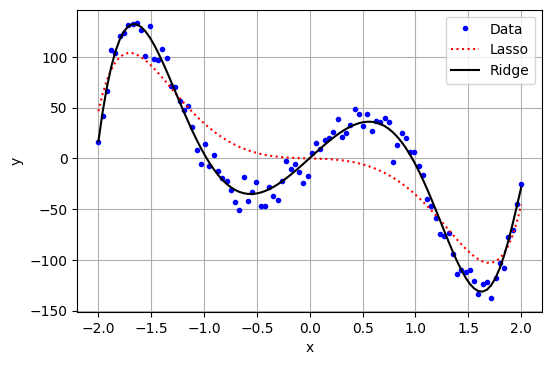

In [ ]:
x_curve = np.linspace(-2, 2, 100)
y_lasso = np.polyval(a_lasso[::-1], x_curve)  # Pas op! coëfficiënten omdraaien bij polyval!
y_ridge = np.polyval(a_ridge[::-1], x_curve)  # Pas op! coëfficiënten omdraaien bij polyval!

plt.plot(x, y, 'b.', x_curve, y_lasso, 'r:', x_curve, y_ridge, 'k-');
plt.xlabel('x');
plt.ylabel('y');
plt.grid();
plt.legend(['Data', 'Lasso', 'Ridge']);

We zien wél dat in beide gevallen overfitting effectief is vermeden, ook al hebben we een regressie met een veelterm van graad 10 uitgevoerd! De Lasso regressiecurve lijdt nu zelfs aan underfitting, terwijl die van Ridge een goeie fit lijkt te zijn. Dat wil echter niet zeggen dat Ridge altijd beter zal zijn dan Lasso. We moeten dit steeds zorgvuldig gaan uitzoeken, met verschillende waarden voor de regularisatieparameter. En om al die verschillende modellen goed te kunnen evalueren en vergelijken, moeten we onze dataset ook hier opsplitsen in een training- en een validatieset. In principe moeten we dat altijd doen, en volgens de regels van de kunst moeten we zelfs een finale evaluatie doen met een testdataset!

## Trainen, valideren, testen

Het opsplitsen van een dataset in training-, validatie- en testset is een best practice binnen machine learning en deep learning. Dit is dus ook **een zeer belangrijk hoofdstuk**!

### Waarom 3 datasets?

In machine learning maken we dus onderscheid tussen 3 soorten datasets:

* De **TRAININGSET** wordt door het **algoritme** gebruikt om het model te trainen, wat betekent dat met deze set de **parameters** worden geoptimaliseerd.
* De **VALIDATIESET** wordt door de **gebruiker** toegepast om **hyperparameters** te finetunen. Denk hier bijvoorbeeld aan het zoeken van de optimale graad bij polynomiale regressie. Aan de hand van de validatieset detecteert men dus **overfitting**, en via het finetunen van de hyperparameters probeert men die overfitting te vermijden.
* De **TESTSET** wordt enkel door de **gebruiker** toegepast voor de **finale evaluatie** van het uiteindelijke geselecteerde model.

Maar waarom is die finale evaluatie nodig? Neem het voorbeeld van de model complexity graph. De polynomiale regressie wordt uitgevoerd op de trainingset, wat betekent dat de coëfficiënten - die we ook de modelparameters noemen - door het algoritme worden geoptimaliseerd aan de hand van deze dataset. Het algoritme gebruikt dus de informatie uit de trainingset om de optimale coëfficiënten te vinden.

De validatieset hebben we niet gebruikt om die parameters te optimaliseren, maar we beslissen wel op basis van deze dataset welk model we uiteindelijk gaan nemen. In ons voorbeeld kiezen we de graad van de veelterm met behulp van de validatiedataset. We gebruiken dus ook informatie uit de validatieset om een finaal model te selecteren en dus "lekt" er informatie vanuit deze set in ons model. We noemen dit **information leaks**, en eigenlijk willen we die zoveel mogelijk vermijden.

Daarom willen we ons geselecteerde model ook evalueren op data die we nog niet gebruikt hebben. Vandaar een derde dataset, de testset, die gebruikt wordt voor de finale evaluatie op ongeziene data. Pas als deze finale evaluatie geslaagd is, is onze keuze definitief. We trainen dan nog een allerlaatste keer het model op de volledige dataset, en dat finale model kan tenslotte in productie gaan om voorspellingen te doen met volledig nieuwe data. Die laatste training rondt de **trainingfase** af, en het toepassen van het model op nieuwe data in een productieomgeving noemen we de **inferentiefase**. Het finale model wordt dan ook het *inference model* genoemd.

### Simple hold-out validation

Moraal van het verhaal: we moeten onze dataset opsplitsen in 3 delen, zoals hieronder staat afgebeeld. We zetten eerst een (kleiner) deel van de dataset aan de kant voor het testen. Het overgebleven deel gebruiken we voor het trainen, maar zoals we weten moeten we daarvan ook een (kleiner) deel gebruiken voor het valideren. We zouden de dataset bijvoorbeeld als volgt kunnen opsplitsen:
* 60-20-20: 60% van de data om te trainen, 20% om te valideren en 20% om te testen
* 80-10-10: 80% van de data om te trainen, 10% om te valideren en 10% om te testen

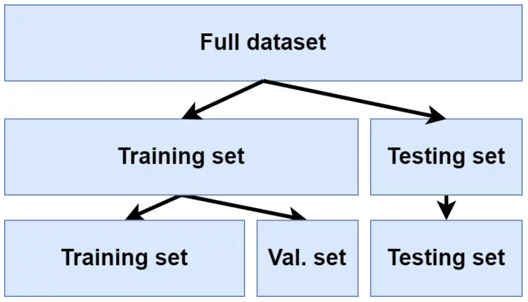

Als we de dataset opsplitsen zoals in de figuur hierboven, en in het bijzonder één (kleiner) deel van de trainingset gebruiken voor de validatie, dan spreken we van **simple hold-out validation**. Je kan hiervoor Scikit-Learn functie `train_test_split()` gebruiken.

Deze manier van werken is prima als we heel veel data hebben. Maar wat als we slechts een beperkte dataset ter beschikking hebben?

### K-fold cross-validation

Bij kleine datasets kan **cross-validation** een oplossing bieden. Hierbij gaan we de trainingset opsplitsen in K gelijke groepen of *folds*. We spreken daarom ook van *K-fold cross-validation*.

Bedoeling is dat we de training K keer gaan herhalen, zodat elke fold één keer dienst doet als validatieset, terwijl de overige folds samen de trainingset vormen. Na elk van de K iteraties of *splits* berekenen we de performantiescore, bijv. de MAE of MSE, voor zowel trainingset als validatieset.

Na het uitvoeren van alle splits, kunnen we dan het gemiddelde van alle scores voor training en validatie berekenen, om dan uiteindelijk op basis van die gemiddelde scores het meest performante model te kiezen.

Onderstaande figuur illustreert het principe:

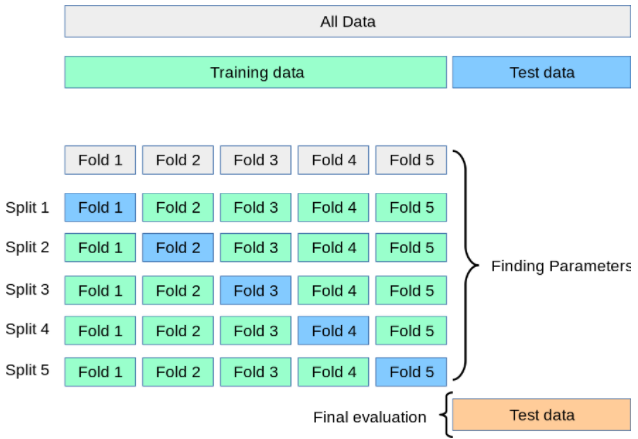

We gaan hier verder in de cursus nog dieper op ingaan, en zeker in het vak Deep Learning. Om af te ronden, geven we wel nog eens de volgende zeer belangrijke raad mee:

**Gouden regel!!!**
> GEBRUIK NOOIT DE TESTDATA OM HET MODEL TE TRAINEN!!! TESTDATA MOGEN ENKEL GEBRUIKT WORDEN OM TE TESTEN!!!

Als je bijvoorbeeld de dataset gaat standaardiseren m.b.v. gemiddelde en standaardafwijking, dan mag je die twee statistieken dus enkel berekenen o.b.v. de trainingset! Maar je gebruikt die dan wel om zowel training- als testset te normaliseren:

```python
mu = mean(X_train)    # mean of training data!
sigma = std(X_train)  # standard deviation of training data!

X_train = (X_train - mu) / sigma  # normalize training data
X_test = (X_test - mu) / sigma    # normalize test data

```

Je moet dus je dataset gaan opsplitsen vooraleer je gaat normaliseren!

---



---
## BRONNEN
*  Handboek: Grokking Machine Learning (version 12), Manning Early Access Program, by Luis G. Serrano, 2020.
*  Deep Learning with Python (2nd edition), Manning Publications, by François Chollet, 2021.
*  https://nl.wikipedia.org/wiki/Polynoom
*  https://nl.wikipedia.org/wiki/Hermite-polynoom
*  https://numpy.org/doc/stable/reference/generated/numpy.polyval.html
*  https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
*  https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2
*  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
*  https://nl.wikipedia.org/wiki/Tijdreeksanalyse
*  https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
*  https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff
*  https://medium.com/@mp32445/understanding-bias-variance-tradeoff-ca59a22e2a83
* https://towardsdatascience.com/ridge-lasso-and-elasticnet-regression-b1f9c00ea3a3
*  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
*  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
*  https://scikit-learn.org/stable/modules/cross_validation.html

---